<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Trabalho%20Pr%C3%A1tico%20-%20Willian%20de%20Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABALHO PRÁTICO - PROCESSAMENTO DE SINAIS
## ALUNO: Willian de Vargas
### Plataforma de execução: Google Colab

In [ ]:
# Bibliotecas necessárias para a execução do trabalho
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

### Antes de iniciar, é preciso ler o arquivo contendo o sinal

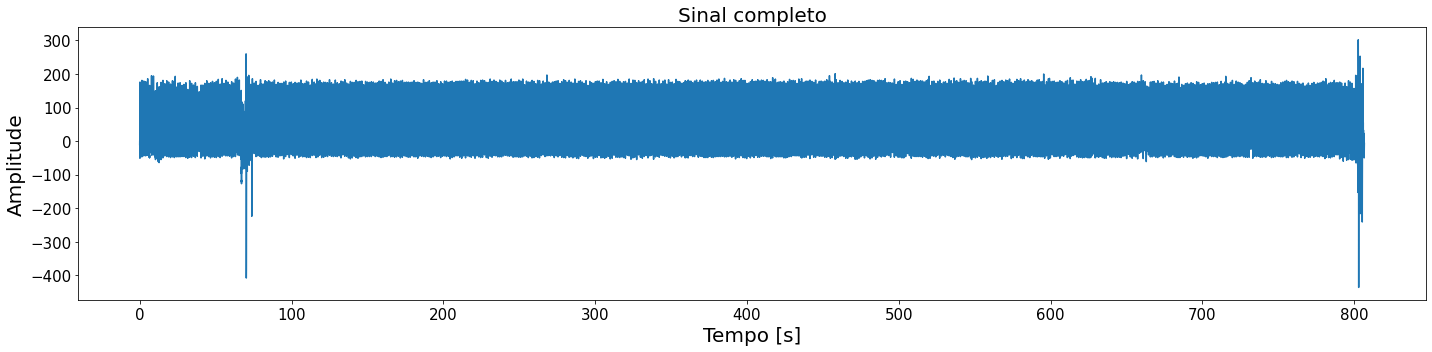

In [ ]:
# Lendo o arquivo contendo o sinal
opentxt = open('ECG.txt', 'r')
sinal = np.loadtxt(opentxt)

ts = 1/600 #Taxa de amostragem
t = np.arange(0, len(sinal)*ts, ts)

# Plotando o sinal original
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1,1,1)
plt.plot(t, sinal)
plt.title("Sinal completo", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.tight_layout()
plt.show()

### Como podemos observar, existem ruídos nas extremidades inicial e final deste sinal. Por isso, devemos cortá-los fora do sinal que iremos analisar. Serão removidas as amostras que estão nos intervalos de 0 à 90 segundos e as amostras presentes após 790 segundos.

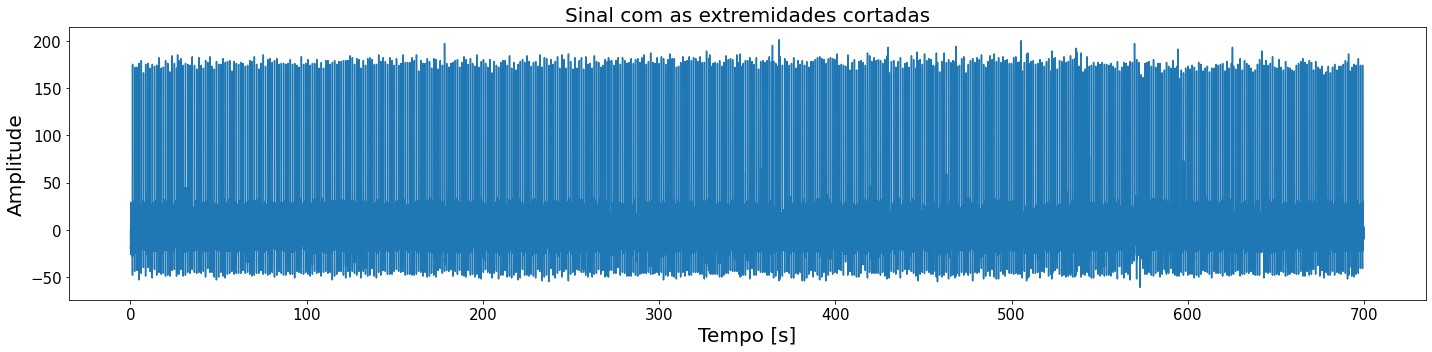

In [ ]:
#Cortando as extremidades do sinal
ts = 1/600
sinal_cortado = sinal[int(90/ts):int(790/ts)]
t = np.arange(0, len(sinal_cortado)*ts,ts)

# Plotando o sinal cortado
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1,1,1)
plt.plot(t, sinal_cortado)
plt.title("Sinal com as extremidades cortadas", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.tight_layout()
plt.show()

# A) plotar o sinal no domínio do TEMPO, ou seja, amplitude da amostra  x segundo, mostrando uma janela mínima de 10 segundos de sinal;

Para esta plotagem, escolhi a janela de tempo compreendida entre 200 e 210 segundos e representei de duas formas: A primeira plotagem mostra o eixo do tempo do corte, ou seja, de 0 a 10 segundos. Já a segudna plotagem apresenta o eixo do tempo real, mostrando os valores de 200 a 210 segundos. Não existe nenhuma diferença entre os sinais plotados, no entando achei adequado apresentar das duas maneiras.


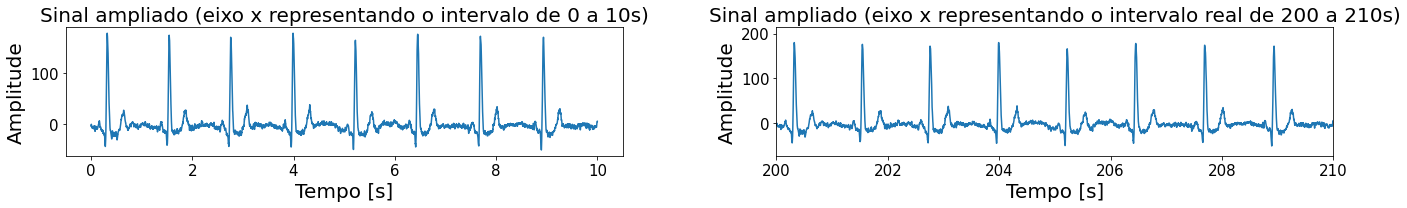

In [ ]:
ts=1/600
sinal_ampliado = sinal_cortado[200*600:210*600] # Trecho escolhido: 200s (200*600 = 120000) à 210s (210*600 = 126000)
t = np.arange(0, len(sinal_ampliado)*ts, ts)
t2 = np.arange(0, len(sinal_cortado)*ts, ts)

# Plotando o sinal ampliado
plt.rcParams['figure.figsize'] = (20, 3)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1,2,1)
plt.plot(t, sinal_ampliado)
plt.title("Sinal ampliado (eixo x representando o intervalo de 0 a 10s)", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(1,2,2)
plt.xlim(left=200, right=210)
plt.plot(t2, sinal_cortado)
plt.title("Sinal ampliado (eixo x representando o intervalo real de 200 a 210s)", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.tight_layout()
plt.show()

# B) levantar o espectro de amplitude do sinal (com janelas de 3, 5 e 10 de  segundos); Compare e discuta os resultados;

Para todas as janelas de tempo, considerei o mesmo ponto inicial (200 segundos) e os pontos finais para as janelas de 3, 5 e 10 segundos foram 203, 205 e 210 segundos, respectivamente.

Para as plotagens, resolvi apresentar de duas formas: A plotagem completa (ou seja, com o espelhamento) e a plotagem sem o espelhamento.


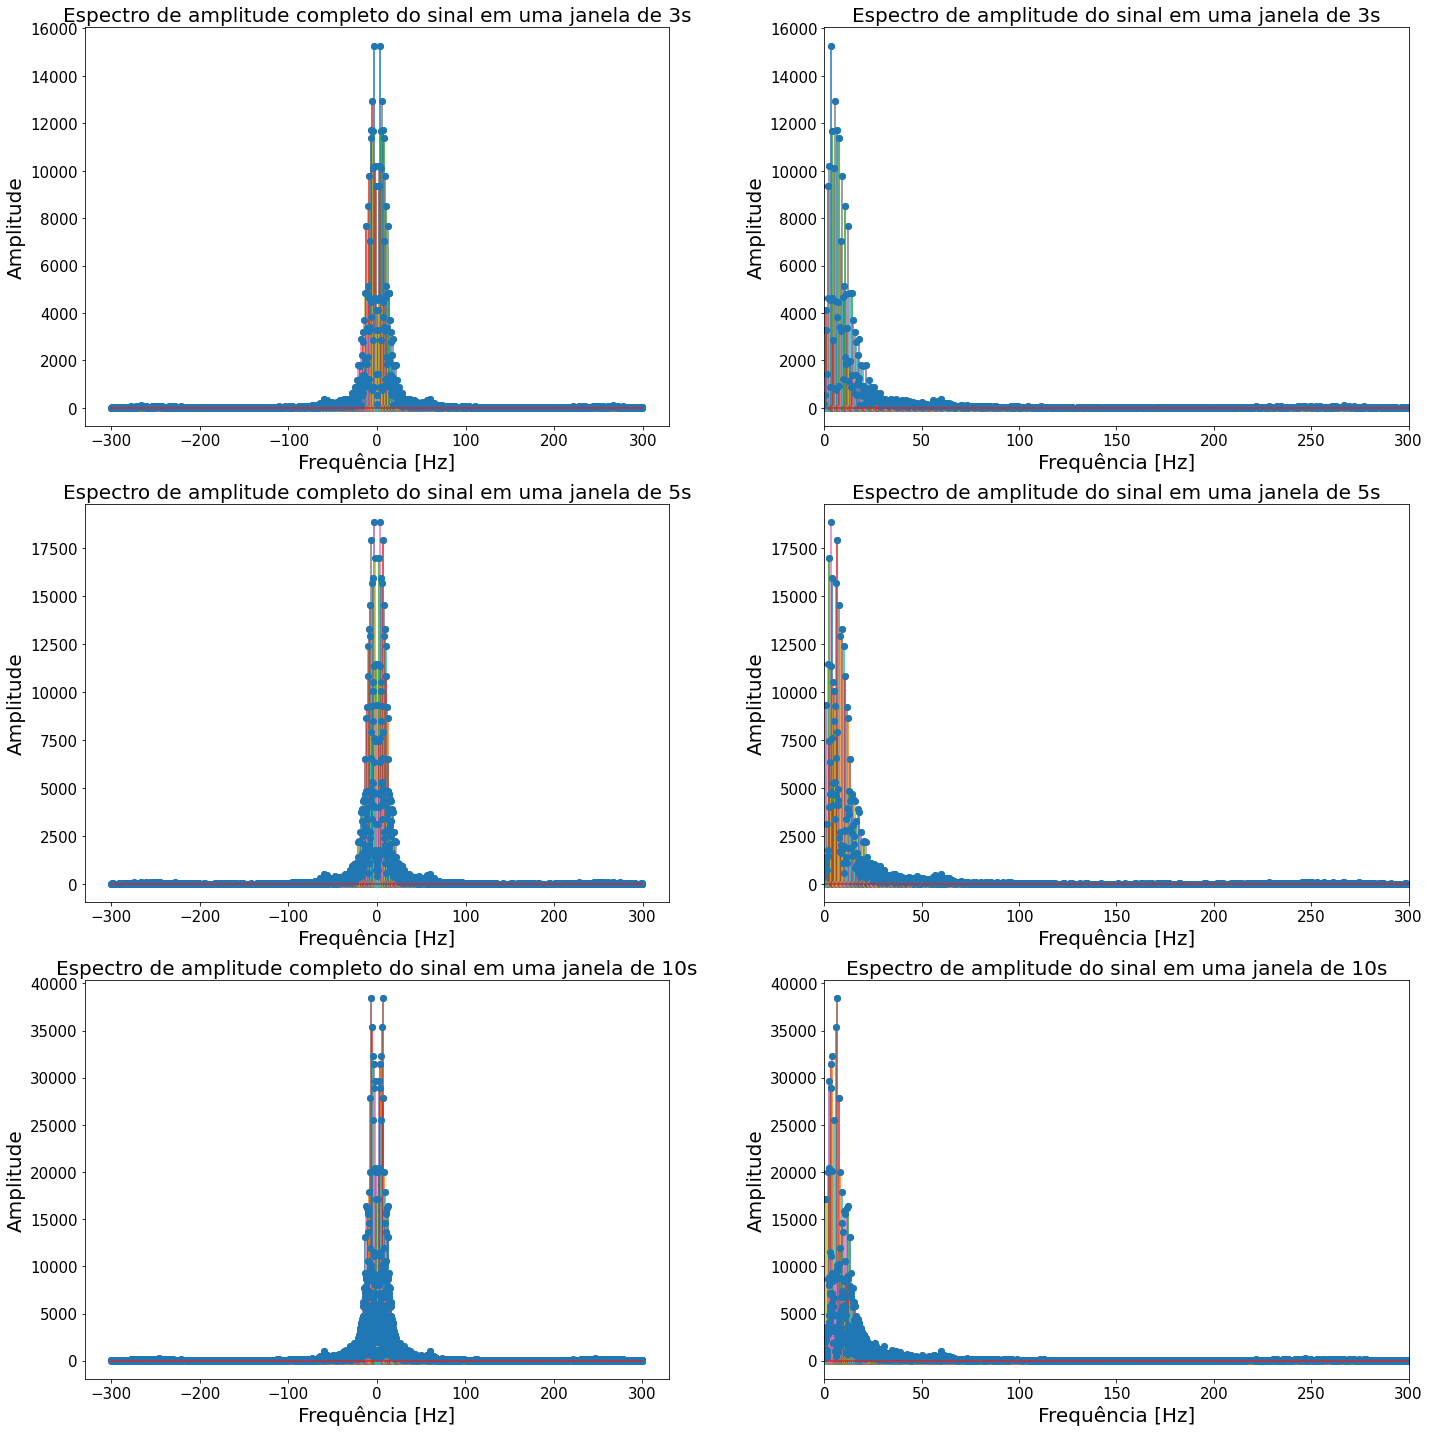

In [ ]:
# Função que levanta o espectro de amplitude
def espectro_amplitude(inicio, fim, taxa_amostragem):
  # Trecho escolhido: inicio[s] (inicio*taxa_amostragem) à fim[s] (fim*taxa_amostragem)
  sinal_ampliado = sinal_cortado[inicio*taxa_amostragem:fim*taxa_amostragem]
  sinal_fft = fftpack.fft(sinal_ampliado)
  magnitude = np.abs(sinal_fft)
  frequencia_amostra = fftpack.fftfreq(sinal_fft.size, d=1/taxa_amostragem)
  return frequencia_amostra, magnitude

#Levantando o espectro de amplitude em uma janela de 3s
frequencia_3s, magnitude_3s = espectro_amplitude(200, 203, 600)
#Levantando o espectro de amplitude em uma janela de 5s
frequencia_5s, magnitude_5s = espectro_amplitude(200, 205, 600)
#Levantando o espectro de amplitude em uma janela de 10s
frequencia_10s, magnitude_10s = espectro_amplitude(200, 210, 600)

# Plotando o espectro de amplitude
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(3,2,1)
plt.stem(frequencia_3s, magnitude_3s, '-o')
plt.title("Espectro de amplitude completo do sinal em uma janela de 3s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(3,2,2)
plt.xlim(left=0, right=300)
plt.stem(frequencia_3s, magnitude_3s, '-o')
plt.title("Espectro de amplitude do sinal em uma janela de 3s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(3,2,3)
plt.stem(frequencia_5s, magnitude_5s, '-o')
plt.title("Espectro de amplitude completo do sinal em uma janela de 5s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(3,2,4)
plt.xlim(left=0, right=300)
plt.stem(frequencia_5s, magnitude_5s, '-o')
plt.title("Espectro de amplitude do sinal em uma janela de 5s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(3,2,5)
plt.stem(frequencia_10s, magnitude_10s, '-o')
plt.title("Espectro de amplitude completo do sinal em uma janela de 10s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.subplot(3,2,6)
plt.xlim(left=0, right=300)
plt.stem(frequencia_10s, magnitude_10s, '-o')
plt.title("Espectro de amplitude do sinal em uma janela de 10s", fontsize=20)
plt.xlabel("Frequência [Hz]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.tight_layout()
plt.show()

## Discussão:

A partir da plotagem em 3 diferentes janelas de tempo (3, 5 e 10 segundos) podemos observar a perda de resolução em janelas de tempo menores, uma vez que com a redução do tempo da janela, ocorre a redução de pontos de amostras.

# C) verificar o tipo de ruído presente no sinal;

Na plotagem abaixo, podemos observar o sinal de maneira mais detalhada (em uma janela de 1 segundo). É possível observar que existe um ruído de alta frequência ocorrendo em baixas amplitudes. Segundo a literatura, este é um tipo de ruído bastante frequente em sinais ECG e normalmente são causados por efeitos externos.


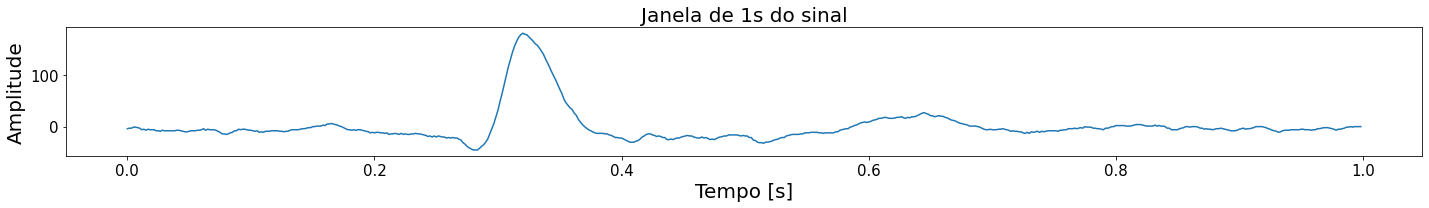

In [ ]:
sinal_ampliado_1s = sinal_cortado[200*600:201*600]
t = np.arange(0, len(sinal_ampliado_1s)*ts, 1/600)

# Plotando o sinal ampliado
plt.rcParams['figure.figsize'] = (20, 3)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1,1,1)
plt.plot(t, sinal_ampliado_1s)
plt.title("Janela de 1s do sinal", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)

plt.tight_layout()
plt.show()

# D) filtrar o sinal com a transformada de Fourier removendo o ruído detectado em c;


Considerando que ao reduzirmos a janela de tempo do sinal, enfrentamos uma perda de resolução do mesmo, decidi realizar a filtragem sobre todo o sinal cortado (ou seja, sem as pontas inicial e final). Após a filtragem, na questão (E) realizarei a plotagem do sinal no dominio do tempo em janelas de tempo menores para visualizarmos o sinal de maneira mais detalhada.

In [ ]:
fft_sinal_cortado = fftpack.fft(sinal_cortado)
magnitude = np.abs(fft_sinal_cortado)
frequencia = fftpack.fftfreq(sinal_cortado.size, d=1/600)

alta_frequencia = fft_sinal_cortado.copy()
alta_frequencia[np.where(magnitude < magnitude_10s.max())]=0
alta_frequencia[np.abs(magnitude) < magnitude_10s.max()]=0
resultado_filtrado = fftpack.ifft(alta_frequencia)

# E) plotar o sinal FILTRADO no domínio do tempo;

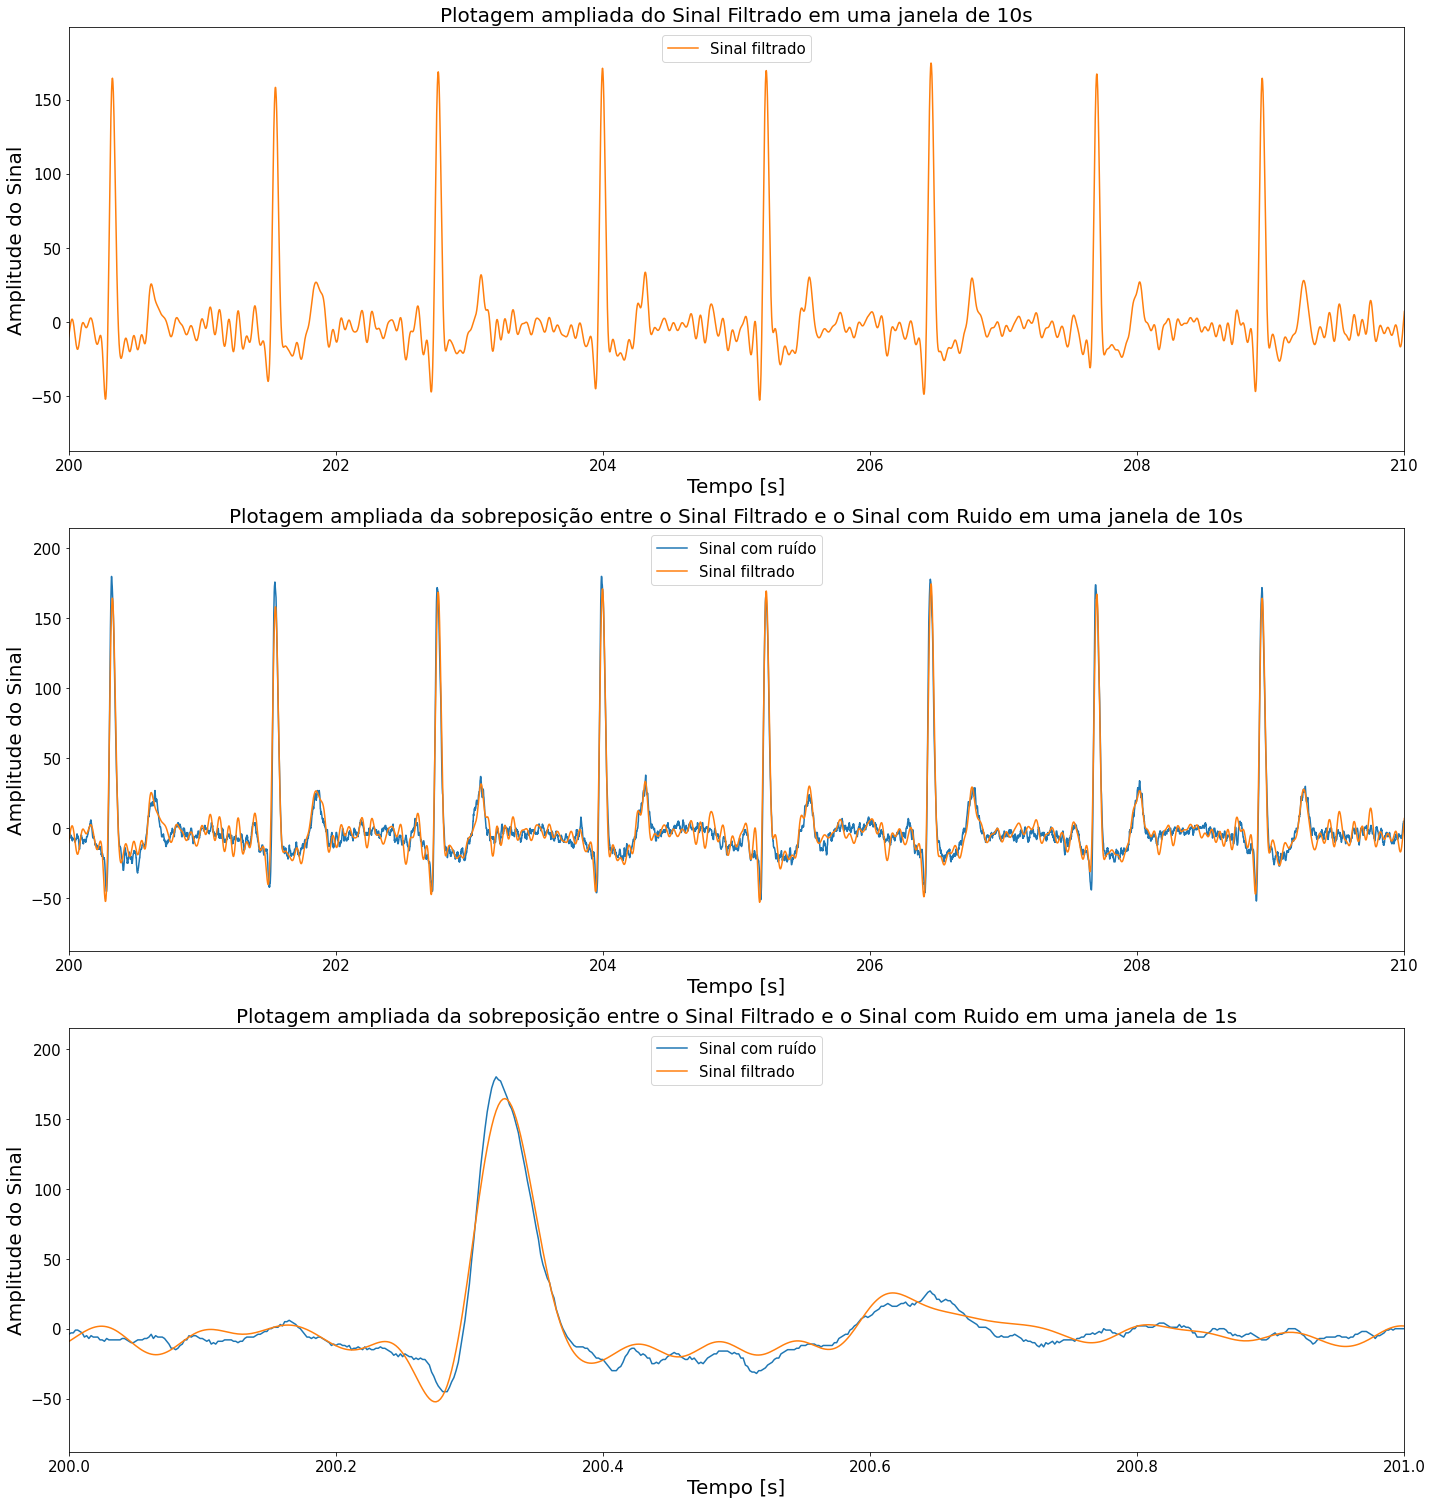

In [ ]:
t = np.arange(0, len(sinal_cortado)*ts, ts)

# Plotando o espectro de amplitude
plt.rcParams['figure.figsize'] = (20, 21)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(3,1,1)
plt.xlim(left=200, right=210)
plt.plot(t, resultado_filtrado, 'tab:orange', label="Sinal filtrado")
plt.title("Plotagem ampliada do Sinal Filtrado em uma janela de 10s", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude do Sinal", fontsize=20)
plt.legend(loc = "upper center", fontsize=15)

plt.subplot(3,1,2)
plt.xlim(left=200, right=210)
plt.plot(t, sinal_cortado, label="Sinal com ruído")
plt.plot(t, resultado_filtrado, label="Sinal filtrado")
plt.title("Plotagem ampliada da sobreposição entre o Sinal Filtrado e o Sinal com Ruido em uma janela de 10s", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude do Sinal", fontsize=20)
plt.legend(loc = "upper center", fontsize=15)

plt.subplot(3,1,3)
plt.xlim(left=200, right=201)
plt.plot(t, sinal_cortado, label="Sinal com ruído")
plt.plot(t, resultado_filtrado, label="Sinal filtrado")
plt.title("Plotagem ampliada da sobreposição entre o Sinal Filtrado e o Sinal com Ruido em uma janela de 1s", fontsize=20)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Amplitude do Sinal", fontsize=20)
plt.legend(loc = "upper center", fontsize=15)

plt.tight_layout()
plt.show()

# F) discuta o resultado obtido.

A aplicação da Transformada de Fourrier sobre o final é capaz de realizar a filtragem do sinal, eliminando o ruído presente nesta amostra. A filtragem do sinal através da Transformada de Fourier consiste em levar a zero todos os coeficientes de alta frequência.

A ampliação do sinal em uma janela muito pequena, de inicio em 200s e término em 201s, foi realizada para que fosse possível visualizar e compreender o comportamento do complexo QRS do sinal, que representa a despolarização ventricular. Elaborei a imagem abaixo para indicar na plotagem da sobreposição entre o sinal com ruído e o sinal filtrado, em uma janela de 1 segundo, onde estão localizadas as ondas.

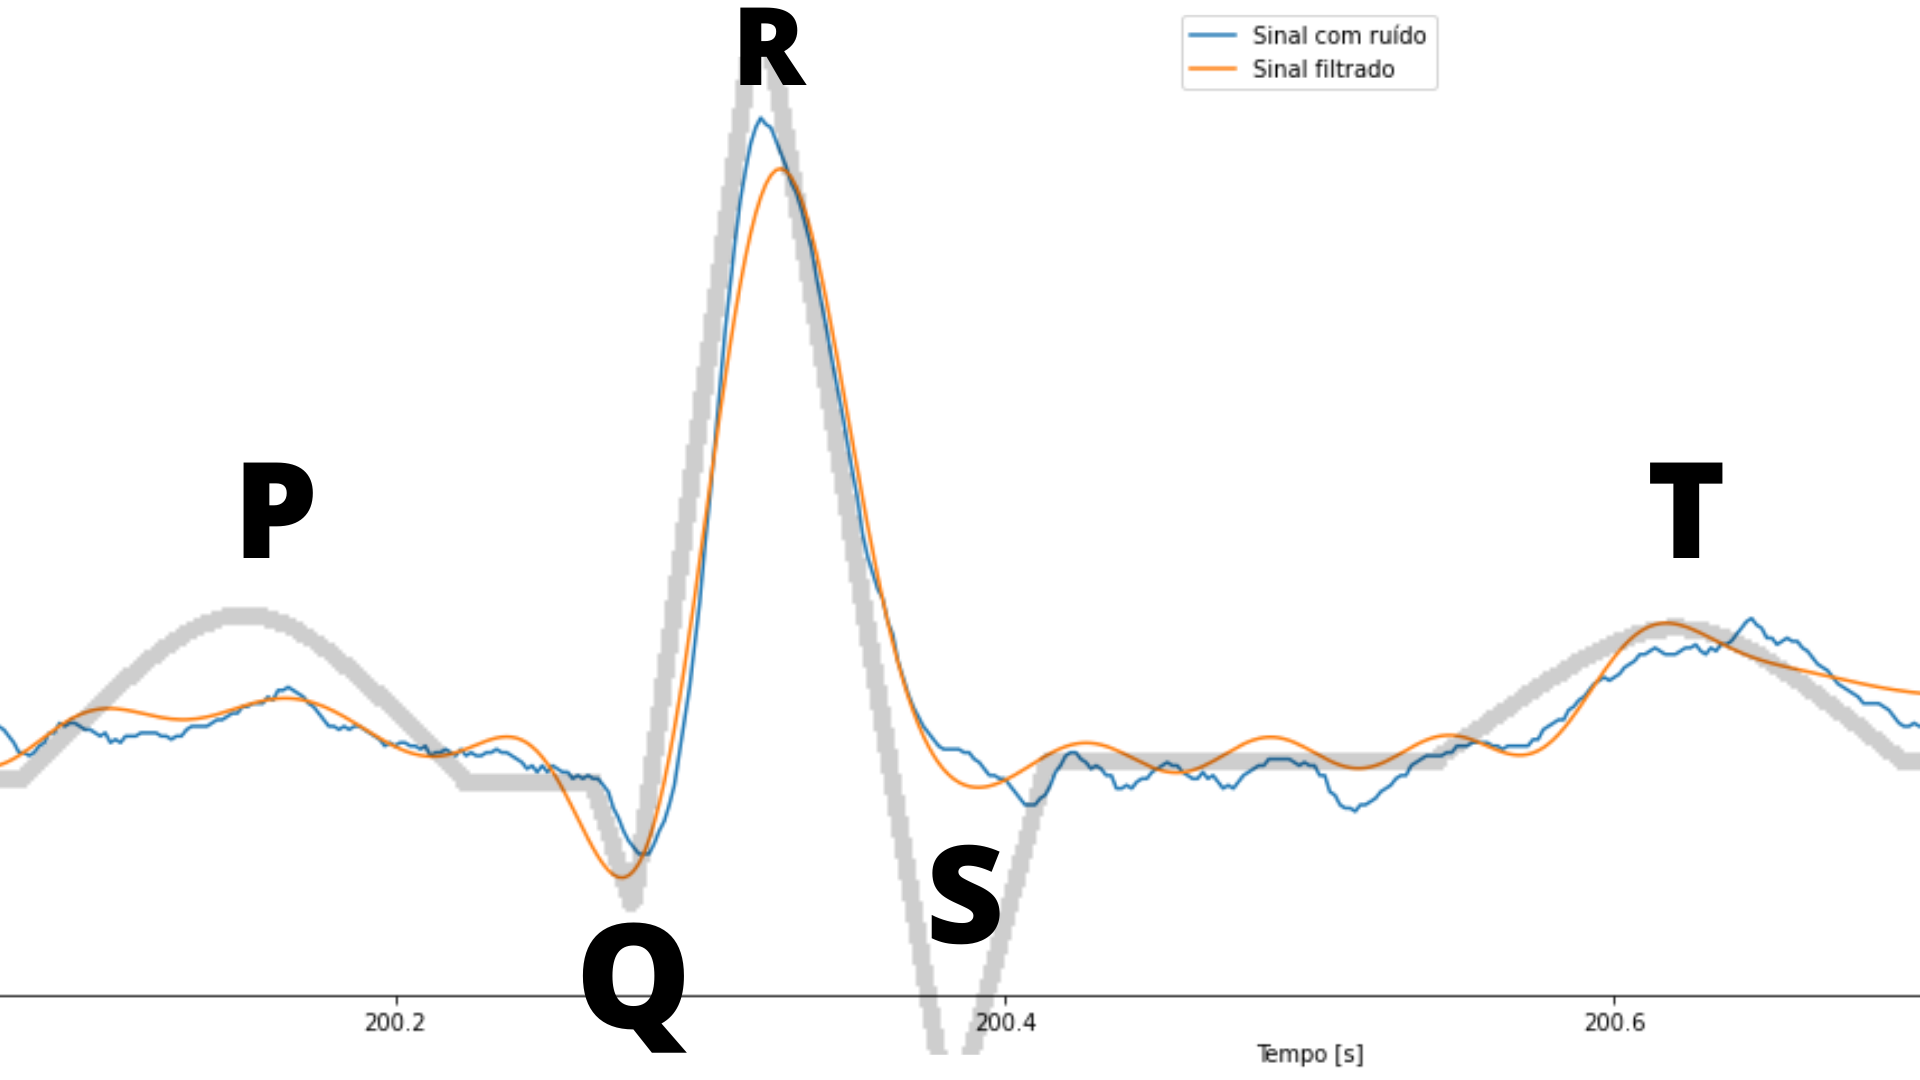

A literatura aponta que, usualmente, a frequência de um sinal ECG está entre 0.05Hz e 150 Hz. Ao executarmos o código da célula que se segue abaixo, podemos verificar que a frequência de maior magnitude de nosso sinal filtrado é aproximadamente igual a 3.2 Hz e está compreendida entre este intervalo.

In [ ]:
frequencia = fftpack.fftfreq(sinal_cortado.size, d=1/600)
frequencia_de_maior_magnitude = frequencia[np.where(magnitude==magnitude.max())][0]

print("A maior frequência de maior magnitude do sinal é igual a: ", frequencia_de_maior_magnitude, " Hz")

A maior frequência de maior magnitude do sinal é igual a:  3.2600077619232426  Hz


A literatura também aponta que a duração média do complexo QRS, quando dito normal, varia de 60ms à 120ms (0,06 à 0,12 segundos). 

Ao analisarmos o comportamento do complexo QRS de nosso sinal, podemos notar que sua duração é de aproximadamente 0,2 segundos, estando dentro dos parâmetros esperados, segundo a literatura.


# Referências:

Zago, Gabriel Tozatto et al. “UTILIZAÇÃO DO MÉTODO DA DECOMPOSIÇÃO DE MODO EMPÍRICO PARA A REMOÇÃO DE RUÍDO EM SINAIS DE ELETROCARDIOGRAMA.” (2019).

Silva, Ideniton Ferreira. “CONDICIONAMENTO DE SINAL PARA ECG.” (2018).

Pastore, CA et al. "Diretrizes da Sociedade Brasileira de Cardiologia sobre Ánalise e Emissão de Laudos Eletrocardiográficos." (2009).

Morsch, Dr. José Aldair. "O QUE SÃO AS ONDAS DO ELETROCARDIOGRAMA E COMO INTERPRETAR?". (2018).